<a href="https://colab.research.google.com/github/jubin-k/Space-Titanic/blob/main/Spaceship_Titanic_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#reading the dataframes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_df=pd.read_csv("/content/spaceship titanic train.csv")
test_df=pd.read_csv("/content/spaceship titaic test.csv")
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_df.shape

(8693, 14)

In [ ]:
train_df.groupby('Transported')['Transported'].count()

Transported
False    4315
True     4378
Name: Transported, dtype: int64

In [ ]:
#checking the datatype of features 
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


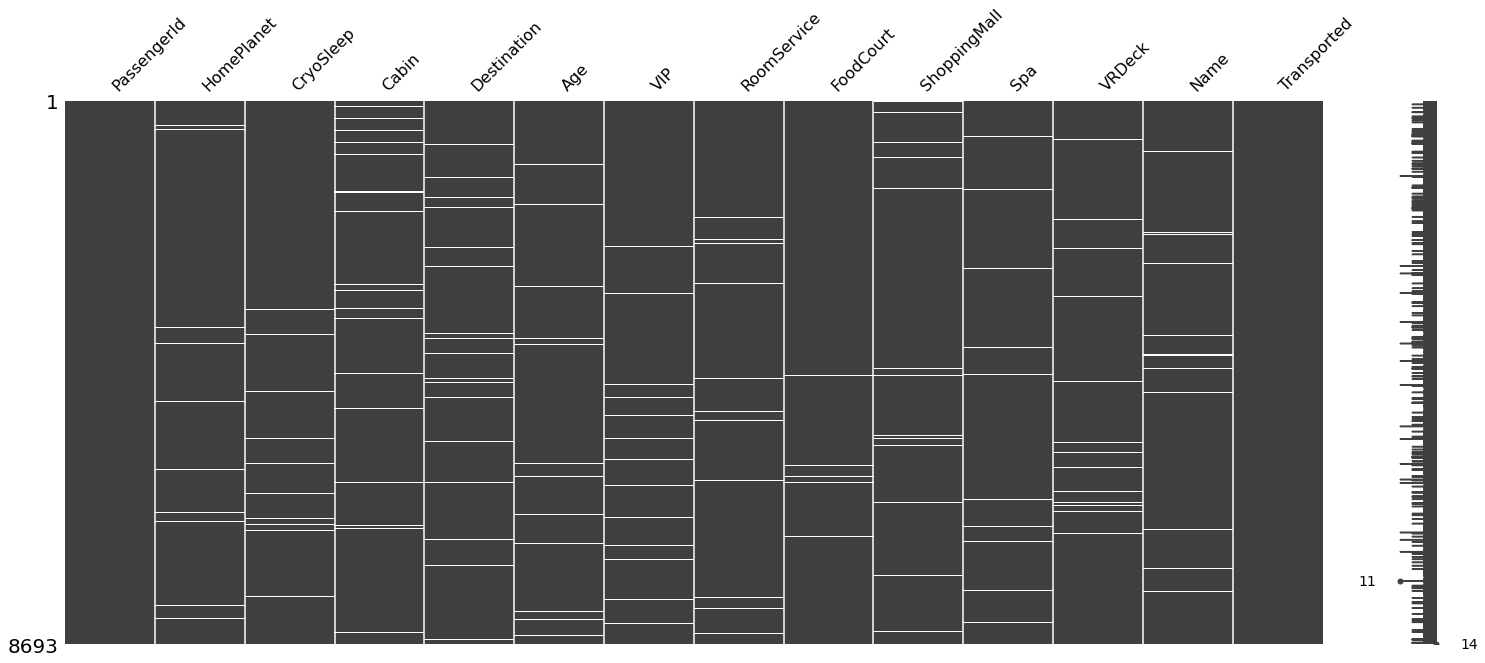

In [ ]:
import missingno as msno
print(train_df.isna().sum()/len(train_df)*100)
msno.matrix(train_df)
#missing values are minimal compared to total dataframe

In [ ]:
train_df.describe()
#around 50% of people didn't spend money on anything
#people spend more money on foodcourt followed by spa,vrdeck, roomservice and shoppingmall

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# people who spend no money
missed=train_df.loc[(train_df['RoomService'] ==0) & (train_df['FoodCourt'] ==0) & (train_df['ShoppingMall'] ==0) & (train_df['Spa'] ==0) & (train_df['VRDeck'] ==0)]
missed.shape[0]
missed['Age'].mean()
#people who don't spend any money are with an avg age of 25

24.858901515151516

In [ ]:
#average age of people who got transported
train_df.groupby('Transported')['Age'].mean()
#people of average age of people getting transported is 28 and not transported is 30

Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64

In [ ]:
train_df.corr()['Transported']
#As people get older, their chance of being transported is beocming low
#people who spend more on services have a less chance of being transported

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

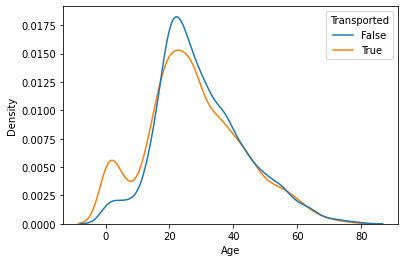

In [ ]:
import seaborn as sns
sns.kdeplot(train_df['Age'],hue=train_df['Transported'])

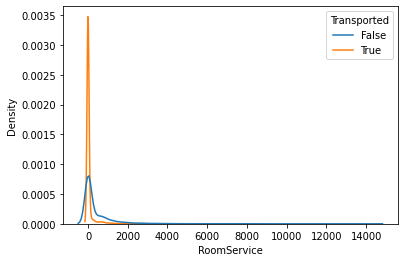

In [ ]:
sns.kdeplot(train_df['RoomService'],hue=train_df['Transported'])

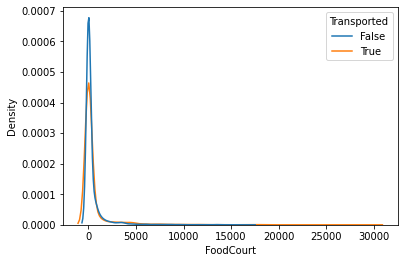

In [ ]:
sns.kdeplot(train_df['FoodCourt'],hue=train_df['Transported'])

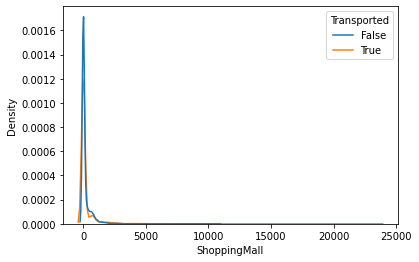

In [ ]:
sns.kdeplot(train_df['ShoppingMall'],hue=train_df['Transported'])

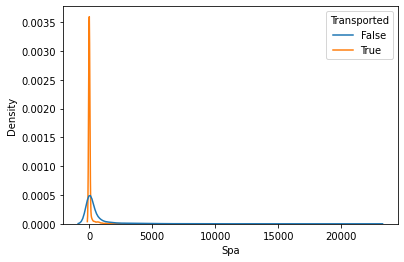

In [ ]:
sns.kdeplot(train_df['Spa'],hue=train_df['Transported'])

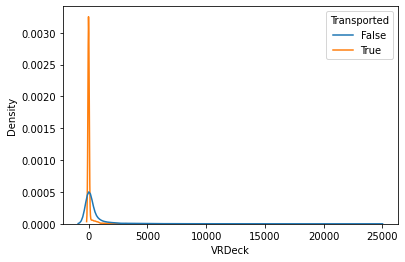

In [ ]:
sns.kdeplot(train_df['VRDeck'],hue=train_df['Transported'])

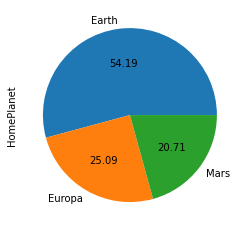

In [ ]:

['HomePlanet'].value_counts().plot(kind='pie',autopct='%.2f')
#people in Earth are more likely to be transported followed by Eurapa and Mars

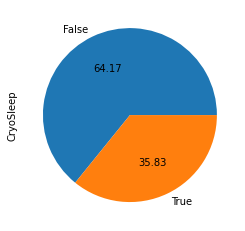

In [ ]:
train_df['CryoSleep'].value_counts().plot(kind='pie',autopct='%.2f')

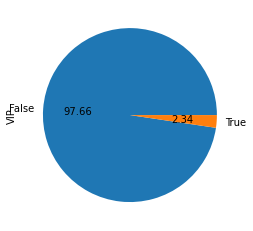

In [ ]:
train_df['VIP'].value_counts().plot(kind='pie',autopct='%.2f')
#Those who spent money on Cryosleep and VIP are less likely to be transported

In [ ]:
train_df.drop(['PassengerId','Name','Cabin'], axis=1,inplace=True)

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
#converting strings into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['HomePlanet']=le.fit_transform(train_df['HomePlanet'])
train_df['CryoSleep']=le.fit_transform(train_df['CryoSleep'])
train_df['Destination']=le.fit_transform(train_df['Destination'])
train_df['VIP']=le.fit_transform(train_df['VIP'])
print(train_df)

      HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0              1          0            2  39.0    0          0.0        0.0   
1              0          0            2  24.0    0        109.0        9.0   
2              1          0            2  58.0    1         43.0     3576.0   
3              1          0            2  33.0    0          0.0     1283.0   
4              0          0            2  16.0    0        303.0       70.0   
...          ...        ...          ...   ...  ...          ...        ...   
8688           1          0            0  41.0    1          0.0     6819.0   
8689           0          1            1  18.0    0          0.0        0.0   
8690           0          0            2  26.0    0          0.0        0.0   
8691           1          0            0  32.0    0          0.0     1049.0   
8692           1          0            2  44.0    0        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported  
0

<ipython-input-106-874a9ff951b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['HomePlanet']=le.fit_transform(train_df['HomePlanet'])
<ipython-input-106-874a9ff951b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['CryoSleep']=le.fit_transform(train_df['CryoSleep'])
<ipython-input-106-874a9ff951b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
#working with test data
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4269,Earth,True,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0
4270,Mars,False,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0
4271,Earth,False,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.isna().sum()/len(test_df)*100

HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_df['HomePlanet']=le.fit_transform(test_df['HomePlanet'])
test_df['CryoSleep']=le.fit_transform(test_df['CryoSleep'])
test_df['Destination']=le.fit_transform(test_df['Destination'])
test_df['VIP']=le.fit_transform(test_df['VIP'])
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4269,0,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0
4270,2,0,2,43.0,0,47.0,0.0,3851.0,0.0,0.0
4271,0,0,2,40.0,0,0.0,865.0,0.0,3.0,0.0
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x=train_df.iloc[:,:-1].values
x
y=train_df.iloc[:,-1].values
y

array([False,  True, False, ...,  True, False,  True])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train
x_test
y_train
y_test

array([ True, False, False, ..., False, False,  True])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)
x_train
x_test

array([[0.        , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.10192763,
        0.00585169],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.11538876,
        0.00132769],
       ...,
       [0.        , 0.        , 1.        , ..., 0.01030138, 0.        ,
        0.00388474],
       [0.        , 0.        , 1.        , ..., 0.00838583, 0.        ,
        0.02261998],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#to find the error rate
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error rate')

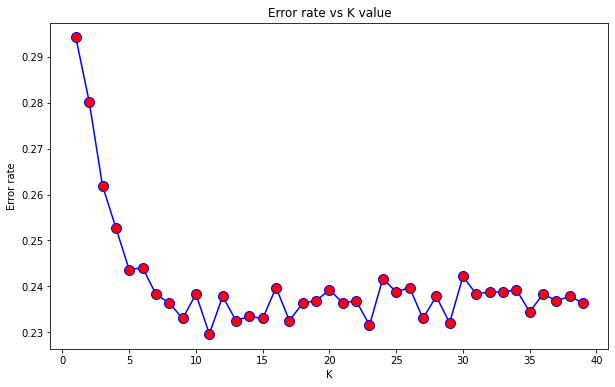

In [ ]:
import matplotlib.pyplot as plt
#plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='b',marker='o',markerfacecolor='r',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
#k value shouldn't be too low or too high
model=KNeighborsClassifier(n_neighbors=17)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ True, False,  True, ..., False, False,  True])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat
score=accuracy_score(y_pred,y_test)
score

0.7674530572941742

In [ ]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

       False       0.77      0.77      0.77      1042
        True       0.77      0.77      0.77      1035

    accuracy                           0.77      2077
   macro avg       0.77      0.77      0.77      2077
weighted avg       0.77      0.77      0.77      2077



In [ ]:
pred=model.predict(test_df)
print(pred)

[ True False False ...  True False False]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#test dataset with the output
test_df['Transported']=pred
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,True
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,False
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,False
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,True
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
4269,0,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,False
4270,2,0,2,43.0,0,47.0,0.0,3851.0,0.0,0.0,True
4271,0,0,2,40.0,0,0.0,865.0,0.0,3.0,0.0,True
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,False
